## HACKATHON SAN ISIDRO
## Transito.

## Apoyo a bomberos


In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from pandas import *
import numpy as np




### Leer la data



In [2]:
#Leemos la data
df = pd.read_csv('data2.csv', sep=",")

dfr = df[['CATEGORY', 'TIME', 'MODALITY','SECTOR', 'SUBSECTOR']]
#print dfr['CATEGORIA'].unique()
#print dfr['MODALIDAD'].unique()
#print len(dfr)
#dfr.tail(10)

#df.drop(["ID", "TIPO"], axis=1)

print len(dfr)
dfr.head(12)


570


,CATEGORY,TIME,MODALITY,SECTOR,SUBSECTOR
0,Fires,11:45,NaN,2,1
1,Car Run Over People,21:34,Driver Recklessness,4,2
2,Car Crash,08:29,Driver Recklessness,4,4
3,Fires,12:26,NaN,3,2
4,Car Run Over People,04:53,Driver Recklessness,2,5
5,Car Crash,06:40,Speeding,1,2
6,Car Crash,18:16,Driver Recklessness,4,1
7,Car Run Over People,19:56,Driver Recklessness,3,2
8,Car Crash,03:38,Driver Recklessness,1,5
9,Car Crash,16:49,Driver Recklessness,3,2


In [3]:
import time
#from datetime import datetime
#from dateutil import parser
from sklearn import preprocessing


dfr = dfr[dfr.CATEGORY != "Breakdown Voltage"]
#dfr = dfr[dfr.CATEGORY != "Car Crash"]



#Convertimos una variable categorica a una variable numerica.
encoder_category = preprocessing.LabelEncoder()
dfr.CATEGORY = encoder_category.fit_transform(dfr.CATEGORY)

#Agregar una nueva columna que sera la variable numerica de 'CATEGORIA'
dfr['CATEGORY_n'] = dfr['CATEGORY']

#Volvemos de la variable numerica a categorica.
dfr.CATEGORY = encoder_category.inverse_transform(dfr.CATEGORY)


#print persona['Actividad'].unique()

encoder_modality= preprocessing.LabelEncoder()
dfr.MODALITY = encoder_modality.fit_transform(dfr.MODALITY)

#Agregar una nueva columna que sera la variable numerica de 'Activity'
dfr['MODALITY_n'] = dfr['MODALITY']

#Volvemos de la variable numerica a categorica.
dfr.MODALITY = encoder_modality.inverse_transform(dfr.MODALITY)



#persona = persona[persona.Actividad != "Spare_Time/TV"]
#persona = persona[persona.Actividad != "Grooming"]
#persona = persona[persona.Actividad != "Snack"]
#persona = persona[persona.Actividad != "Toileting"]
#persona = persona[persona.Actividad != "Showering"]

#


#dfr = dfr[dfr.CATEGORY != "Accidente de Tránsito Choque"]
#dfr = dfr[dfr.CATEGORY != "Accidente de Tránsito Despiste"]
#dfr = dfr[dfr.CATEGORY != "Caídas de Personas"]
#dfr = dfr[dfr.CATEGORIA != "Amagos de Incendio, Incendios, Siniestros"]
#dfr = dfr[dfr.CATEGORY != "Aniegos, Sismos, Catástrofes"]

#Ver data
#dfr.tail(25)

#persona = persona[persona.Actividad != "Leaving"]
#Ver la nueva data
#print persona[['Actividad','Actividad_numero']]
print len(dfr)

dfr.head(10)

569


/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,CATEGORY,TIME,MODALITY,SECTOR,SUBSECTOR,CATEGORY_n,MODALITY_n
0,Fires,11:45,NaN,2,1,4,0
1,Car Run Over People,21:34,Driver Recklessness,4,2,3,2
2,Car Crash,08:29,Driver Recklessness,4,4,1,2
3,Fires,12:26,NaN,3,2,4,0
4,Car Run Over People,04:53,Driver Recklessness,2,5,3,2
5,Car Crash,06:40,Speeding,1,2,1,7
6,Car Crash,18:16,Driver Recklessness,4,1,1,2
7,Car Run Over People,19:56,Driver Recklessness,3,2,3,2
8,Car Crash,03:38,Driver Recklessness,1,5,1,2
9,Car Crash,16:49,Driver Recklessness,3,2,1,2


## Ver tabla completa

In [4]:
#Ver data
print len(dfr)
dfr.tail(15)

print dfr['CATEGORY'].unique()

569
['Fires' 'Car Run Over People' 'Car Crash' 'Car Cluelessness'
 'People Falls' 'Gas leak' 'Car Rollover' 'Flood']


In [5]:
def datetime_to_int(dt_list):
    ftr = [3600,60]
    return [sum([a*b for a,b in zip(ftr, map(int,x.split(':')))]) for x in dt_list]

def map_time(time):
    #for i, e in enumerate(time):
    temp = []
    for e in time:
        if e >= 72000 or e <= 21600:
            temp.append(4)#night
        elif e > 21600 and e <= 43200:
            temp.append(1)#morning
        elif e > 43200 and e <= 61200:
            temp.append(2)#afternoon
        elif e > 61200 and e < 72000:
            temp.append(3)#evening
    return temp

def map_time_descrip(time):
    #for i, e in enumerate(time):
    temp = []
    for e in time:
        if e == 4:
            temp.append('Night')#night
        elif e == 1 and e <= 43200:
            temp.append('Morning')#morning
        elif e == 2 and e <= 61200:
            temp.append('Afternoon')#afternoon
        elif e == 3 and e < 72000:
            temp.append('Evening')#evening
    return temp

time_seconds = datetime_to_int(dfr['TIME'])
dfr['TIME_s'] = time_seconds

time_map = map_time(dfr['TIME_s'])
dfr['TIME_n'] = time_map

time_descrip = map_time_descrip(dfr['TIME_n'])
dfr['TIME_desc'] = time_descrip

print datetime_to_int(['6:00','12:00', '17:00', '20:00'])
#final_hora = datetime_to_int(persona['final_hora'])

#print inicio_hora

#persona['final_hora_n'] = final_hora

#Extraemos las columnas importantes para crear el modelo
#print dfr['CATEGORIA']

#dfr['CATEGORIA'].unique()
#dfr.tail()
print len(dfr)
dfr.head(15)

[21600, 43200, 61200, 72000]
569


,CATEGORY,TIME,MODALITY,SECTOR,SUBSECTOR,CATEGORY_n,MODALITY_n,TIME_s,TIME_n,TIME_desc
0,Fires,11:45,NaN,2,1,4,0,42300,1,Morning
1,Car Run Over People,21:34,Driver Recklessness,4,2,3,2,77640,4,Night
2,Car Crash,08:29,Driver Recklessness,4,4,1,2,30540,1,Morning
3,Fires,12:26,NaN,3,2,4,0,44760,2,Afternoon
4,Car Run Over People,04:53,Driver Recklessness,2,5,3,2,17580,4,Night
5,Car Crash,06:40,Speeding,1,2,1,7,24000,1,Morning
6,Car Crash,18:16,Driver Recklessness,4,1,1,2,65760,3,Evening
7,Car Run Over People,19:56,Driver Recklessness,3,2,3,2,71760,3,Evening
8,Car Crash,03:38,Driver Recklessness,1,5,1,2,13080,4,Night
9,Car Crash,16:49,Driver Recklessness,3,2,1,2,60540,2,Afternoon


## Ordenamos la data por columnas

In [6]:
dfr = dfr[['TIME','TIME_s','TIME_n','TIME_desc','SECTOR','SUBSECTOR', 'CATEGORY', 'CATEGORY_n','MODALITY','MODALITY_n']]

dfr.head(10)
#print len(dfr)
#persona.head(30)

#print dfr['CATEGORIA'].unique()

#print len(dfr)

,TIME,TIME_s,TIME_n,TIME_desc,SECTOR,SUBSECTOR,CATEGORY,CATEGORY_n,MODALITY,MODALITY_n
0,11:45,42300,1,Morning,2,1,Fires,4,NaN,0
1,21:34,77640,4,Night,4,2,Car Run Over People,3,Driver Recklessness,2
2,08:29,30540,1,Morning,4,4,Car Crash,1,Driver Recklessness,2
3,12:26,44760,2,Afternoon,3,2,Fires,4,NaN,0
4,04:53,17580,4,Night,2,5,Car Run Over People,3,Driver Recklessness,2
5,06:40,24000,1,Morning,1,2,Car Crash,1,Speeding,7
6,18:16,65760,3,Evening,4,1,Car Crash,1,Driver Recklessness,2
7,19:56,71760,3,Evening,3,2,Car Run Over People,3,Driver Recklessness,2
8,03:38,13080,4,Night,1,5,Car Crash,1,Driver Recklessness,2
9,16:49,60540,2,Afternoon,3,2,Car Crash,1,Driver Recklessness,2


In [7]:
#import matplotlib
#matplotlib.use('Agg')
#import numpy as np

#X = persona[['inicio_hora_n','final_hora_n']]

dfr2 = dfr[['TIME_n','SECTOR','SUBSECTOR', 'CATEGORY_n']]

print "\n\n\n"
dfr2.head(15)


,TIME_n,SECTOR,SUBSECTOR,CATEGORY_n
0,1,2,1,4
1,4,4,2,3
2,1,4,4,1
3,2,3,2,4
4,4,2,5,3
5,1,1,2,1
6,3,4,1,1
7,3,3,2,3
8,4,1,5,1
9,2,3,2,1


In [8]:
#Contar la cantidad de cada valor

dfr2['CATEGORY_n'].value_counts()

1    384
0     50
7     41
3     37
5     24
4     22
6      7
2      4
Name: CATEGORY_n, dtype: int64

### Descripcion de las tablas

In [9]:
# print dfr['CATEGORY'].unique()
# print encoder_category.fit_transform(dfr['CATEGORY'].unique())
d1 = dfr[['CATEGORY', 'CATEGORY_n']]
d1.drop_duplicates()

# print d1.drop_duplicates().to_string(index=False)

,CATEGORY,CATEGORY_n
0,Fires,4
1,Car Run Over People,3
2,Car Crash,1
11,Car Cluelessness,0
12,People Falls,7
43,Gas leak,6
54,Car Rollover,2
77,Flood,5


In [10]:
d2 = dfr[['TIME_desc', 'TIME_n']]
d2.drop_duplicates()



,TIME_desc,TIME_n
0,Morning,1
1,Night,4
3,Afternoon,2
6,Evening,3


## Analisis exploratorio

In [11]:
description = dfr2.describe()
description

,TIME_n,SECTOR,SUBSECTOR,CATEGORY_n
count,569.000000,569.000000,569.000000,569.000000
mean,2.110721,2.866432,2.717047,1.827768
std,1.074697,1.438804,1.567408,1.897516
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000
75%,3.000000,4.000000,3.000000,1.000000
max,4.000000,5.000000,7.000000,7.000000


### Bar plot para TIME_n

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


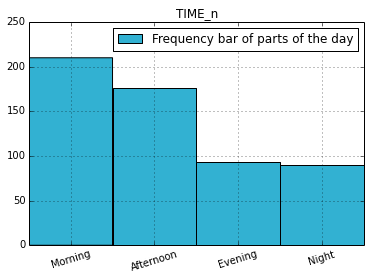

In [12]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

dfr2['TIME_n'].hist(color=[(0.196, 0.694, 0.823)], bins=np.arange(1, 
                        dfr2['TIME_n'].max()+2), align='left', label = 'Frequency bar of parts of the day')


plt.title('TIME_n')
plt.yticks()
plt.xticks(np.arange(1,5), ('Morning', 'Afternoon', 'Evening', 
                            'Night'), rotation=17)
plt.legend(loc='best')
plt.show()
# plt.savefig('hist_time_n.eps', format='eps', dpi=1000)
# plt.close()

### Bar plot para SECTOR

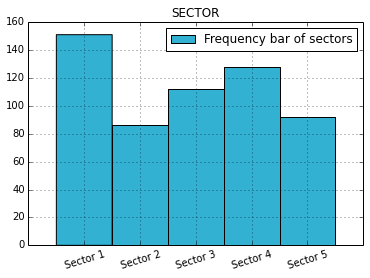

In [13]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


dfr2['SECTOR'].hist(color=[(0.196, 0.694, 0.823)], bins=np.arange(1, 
                        dfr2['SECTOR'].max()+2), align='left', label = 'Frequency bar of sectors')


plt.title('SECTOR')
plt.yticks()
plt.xticks(np.arange(dfr2['SECTOR'].min(),dfr2['SECTOR'].max()+1), ('Sector 1', 'Sector 2', 'Sector 3', 
                             'Sector 4', 'Sector 5'), rotation=17)
plt.legend(loc='best')
# plt.savefig('hist_sectors.eps', format='eps', dpi=1000)
plt.show()
# plt.close()

### Bar plot para SUBSECTOR

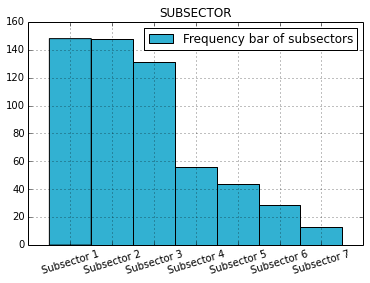

In [14]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

dfr2['SUBSECTOR'].hist(color=[(0.196, 0.694, 0.823)], bins=np.arange(1, 
                        dfr2['SUBSECTOR'].max()+2), align='left', label = 'Frequency bar of subsectors')


plt.title('SUBSECTOR')
plt.yticks()
plt.xticks(np.arange(dfr2['SUBSECTOR'].min(),dfr2['SUBSECTOR'].max()+1), ('Subsector 1', 'Subsector 2', 'Subsector 3', 
                             'Subsector 4', 'Subsector 5','Subsector 6', 'Subsector 7'), rotation=17)
plt.legend(loc='best')
plt.show()
# plt.savefig('hist_subsectors.eps', format='eps', dpi=1000)
# plt.close()

### Bar plot para CATEGORY_n

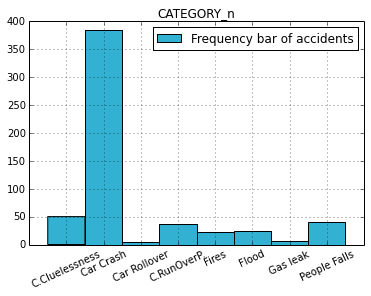

In [15]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

dfr2['CATEGORY_n'].hist(color=[(0.196, 0.694, 0.823)], bins=np.arange(0, 
                        dfr2['CATEGORY_n'].max()+2), align='left', label = 'Frequency bar of accidents')


plt.title('CATEGORY_n')
plt.yticks()
plt.xticks(np.arange(0,8), ('C.Cluelessness', 'Car Crash', 'Car Rollover', 
                            'C.RunOverP.', 'Fires', 'Flood', 'Gas leak', 'People Falls'), 
            rotation=25, fontsize = 10)
plt.legend(loc='best')
# plt.savefig('hist_category_n.eps', format='eps', dpi=1000)
plt.show()
# plt.close()


# dfr2['CATEGORY_n'].hist(alpha=0.5, bins=np.arange(0, 
#                         dfr2['CATEGORY_n'].max()+2), align='left', label = 'Frequency bar of accidents')


# plt.title('CATEGORY_n', fontsize = 26)
# plt.yticks(fontsize = 26)
# plt.xticks(np.arange(0,8), ('Car Cluelessness', 'Car Crash', 'Car Rollover', 
#                             'Car Run Over People', 'Fires', 'Flood', 'Gas leak', 'People Falls'), rotation=25,
#                               fontsize = 17)
# plt.legend(loc='best', prop={'size':26})


### Correlation

['TIME_n', 'SECTOR', 'SUBSECTOR', 'CATEGORY_n']


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


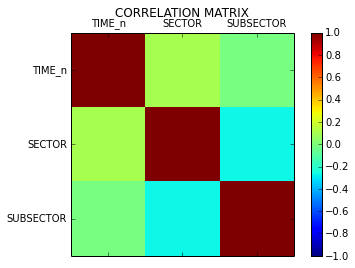

In [16]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

names = list(dfr2.columns.values)
print names
correlations = dfr2[['TIME_n','SECTOR','SUBSECTOR']].corr()
fig = plt.figure()
plt.title('CORRELATION MATRIX')
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
# plt.savefig('correlation.eps', format='eps')
# plt.close()

## Scatter plot entre variables

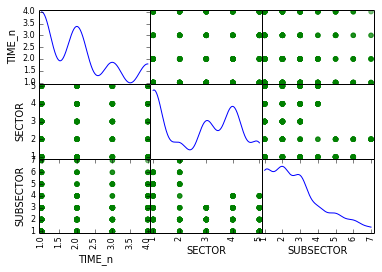

In [17]:
from pandas.tools.plotting import scatter_matrix
#from pandas.tools.plotting import andrews_curves

#plt.figure(figsize=(35, 15))
palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be']

df3 = dfr2[['TIME_n','SECTOR','SUBSECTOR']]
# area = np.pi * (8 * 8**2 )
# plt.scatter(df3['SECTOR'], df3['SUBSECTOR'], s=area, c=["red"], alpha=0.5)
# plt.xlabel('SECTOR')
# plt.ylabel('SUBSECTOR')
# plt.title('SECTOR vs SUBSECTOR')
# plt.show()
# plt.savefig('SECTOR vs SUBSECTOR.png')
# plt.close()
scatter_matrix(df3,alpha=0.5, marker='O', diagonal='density', color=['green'])
#dfr2.plot.scatter(x='SECTOR', y='SUBSECTOR')
#fig, axes = plt.subplots(nrows=2, ncols=1)

# plt.subplots_adjust(hspace=0.5)

# dfr2.plot.hexbin(x='TIME_n', y='SUBSECTOR', gridsize=10)
# dfr2.plot.hexbin(x='TIME_n', y='SECTOR', gridsize=10)
# dfr2.plot.hexbin(x='SECTOR', y='SUBSECTOR', gridsize=10)
# ax1.set_ylabel('a')
# ax2.set_ylabel('b')
# plt.subplot(133)

#dfr2.plot.pie()
#plt.savefig('hola.png')
plt.show()
# plt.close()

# Creando el modelo

Para esto se usa un split estratificado, que balancea los datos de entrenamiento para que no
halla predisposicion por alguna clase en particular.

In [18]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn import cross_validation, datasets 


X = dfr2[['TIME_n','SECTOR', 'SUBSECTOR']]
y = dfr2['CATEGORY_n']


y = np.array(y)
X = np.array(X)


#print X
#X = iris.data[:,:2]
#y = iris.target


sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.3, random_state=0)

#print len(sss)
#print list(sss)
for train_index, test_index in sss:
    #print("TRAIN:", train_index, "TEST:", test_index)
    #print ''
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#train_index = 0
#X_train, X_test = X[train_index], X[test_index]
#y_train, y_test = y[train_index], y[test_index]


#X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)
#y_train, y_test = pd.Series(y_train), pd.Series(y_test)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic

In [19]:
#Creamos el modelo
from sklearn import linear_model
model = linear_model.LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')

#Ajustar el modelo segun los datos de entrenamiento.

model.fit(X_train, y_train)
#X_test = model.transform(X_test)
#y_test = model.transform(y_test)

print "Score: ", model.score(X_test,y_test)


#Predecimos los valores con datos entrenados
predictions = model.predict(X_test)

y_test = pd.Series(y_test)


#print "\n>>>Resultados\n\n"
#print len(resultados)
#resultados


Score:  0.678362573099


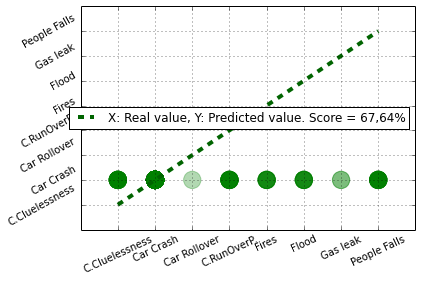

In [20]:
#Ploteando

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


y_test = list(y_test)

plt.scatter(y_test, predictions, alpha=0.3, color='green', s=300)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='darkgreen',lw=4, 
         label= 'X: Real value, Y: Predicted value. Score = 67,64%')
# plt.xlabel('Real value', fontsize=26)
# plt.ylabel('Predicted value', fontsize=26)
# plt.title('Real value vs Predicted value', fontsize=26)
plt.xticks(np.arange(0,8), ('C.Cluelessness', 'Car Crash', 'Car Rollover', 
                            'C.RunOverP.', 'Fires', 'Flood', 'Gas leak', 'People Falls'), rotation=25,
                              fontsize = 10)
plt.yticks(np.arange(0,8), ('C.Cluelessness', 'Car Crash', 'Car Rollover', 
                            'C.RunOverP.', 'Fires', 'Flood', 'Gas leak', 'People Falls'), 
               rotation=29, fontsize = 10)
plt.legend(loc='best')
plt.grid(True)
plt.show()
# plt.savefig('logistic.eps', format='eps', dpi=1000)
# plt.close()

## Confusion matrix Logistic

Confusion matrix with normalization
[[ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]]


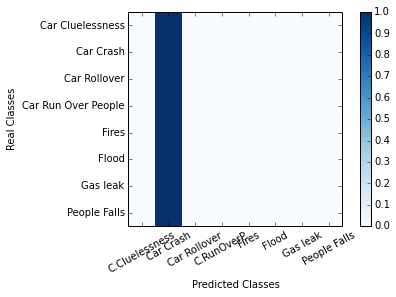

In [21]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_test = list(y_test)
y_pred = predictions

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    plt.colorbar()
    target_namesY = ['Car Cluelessness', 'Car Crash', 'Car Rollover', 
                            'Car Run Over People', 'Fires', 'Flood', 'Gas leak', 'People Falls']
    target_namesX = ['C.Cluelessness', 'Car Crash', 'Car Rollover', 
                            'C.RunOverP.', 'Fires', 'Flood', 'Gas leak', 'People Falls']
    tick_marks = np.arange(len(target_namesX))
    plt.xticks(tick_marks, target_namesX, rotation=29)
    plt.yticks(tick_marks, target_namesY)
    plt.tight_layout()
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)
# print('Confusion matrix without normalization')
# print(cm)
# #plt.figure()
# plot_confusion_matrix(cm)
# plt.show()
# #plt.savefig('Confusion-matrix-sin-normalization.png')
# plt.close()


# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Confusion matrix with normalization')
print(cm_normalized)
#plt.figure()
# plot_confusion_matrix(cm_normalized, title='Confusion matrix, Logistic Regression')
plot_confusion_matrix(cm_normalized)
plt.show()
#plt.savefig('Confusion-matrix-normalizada.png')
# plt.savefig('confusion_matrix_logistic.eps', format='eps')
# plt.close()

## Random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=10)

#Ajustar el modelo segun los datos de entrenamiento.

model.fit(X_train, y_train)

print "Score: ", model.score(X_test,y_test)


#print dfr2
#Predecimos los valores con datos entrenados
predictions = model.predict(X_test)

y_test = pd.Series(y_test)

indices = y_test.index.values
#print persona[['inicio_hora', 'final_hora', 'Actividad', 'Actividad_numero']].loc[indices]

result = dfr[['SECTOR','SUBSECTOR', 'CATEGORY', 'CATEGORY_n']].loc[indices]
result["PREDICTION"] = predictions

#Volvemos de la variable numerica a categorica.
result.PREDICTION = encoder_category.inverse_transform(result.PREDICTION)

result.head(15)

Score:  0.59649122807


,SECTOR,SUBSECTOR,CATEGORY,CATEGORY_n,PREDICTION
0,2,1,Fires,4,Car Crash
1,4,2,Car Run Over People,3,Car Crash
2,4,4,Car Crash,1,Car Crash
3,3,2,Fires,4,Car Crash
4,2,5,Car Run Over People,3,Flood
5,1,2,Car Crash,1,Car Crash
6,4,1,Car Crash,1,Car Rollover
7,3,2,Car Run Over People,3,Flood
8,1,5,Car Crash,1,Car Crash
9,3,2,Car Crash,1,Car Crash


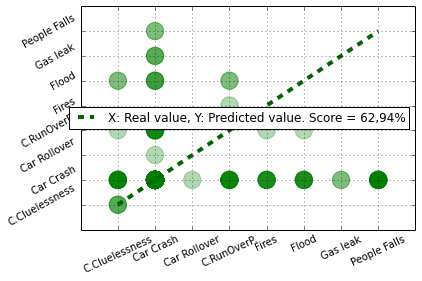

In [23]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

#Ploteando
y_test = list(y_test)

plt.scatter(y_test, predictions, alpha=0.3, color='green', s=300)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='darkgreen',lw=4, 
         label= 'X: Real value, Y: Predicted value. Score = 62,94%')
# plt.xlabel('Real value', fontsize=26)
# plt.ylabel('Predicted value', fontsize=26)
# plt.title('Real value vs Predicted value', fontsize=26)
plt.xticks(np.arange(0,8), ('C.Cluelessness', 'Car Crash', 'Car Rollover', 
                            'C.RunOverP.', 'Fires', 'Flood', 'Gas leak', 'People Falls'), rotation=25,
                              fontsize = 10)
plt.yticks(np.arange(0,8), ('C.Cluelessness', 'Car Crash', 'Car Rollover', 
                            'C.RunOverP.', 'Fires', 'Flood', 'Gas leak', 'People Falls'), rotation=29,
                              fontsize = 10)
plt.legend(loc='best')

plt.grid(True)
plt.show()
# plt.savefig('random_forest.eps', format='eps')
# plt.close()

## Confusion Matrix Random Forest

Confusion matrix with normalization
[[ 0.2    0.6    0.     0.067  0.     0.133  0.     0.   ]
 [ 0.     0.853  0.009  0.06   0.     0.034  0.026  0.017]
 [ 0.     1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.727  0.     0.     0.091  0.182  0.     0.   ]
 [ 0.     0.857  0.     0.143  0.     0.     0.     0.   ]
 [ 0.     0.857  0.     0.143  0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.   ]]


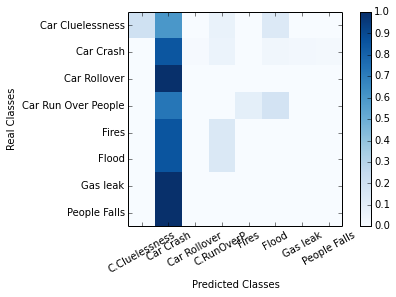

In [24]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_test = list(y_test)
y_pred = predictions

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    plt.colorbar()
    target_namesY = ['Car Cluelessness', 'Car Crash', 'Car Rollover', 
                            'Car Run Over People', 'Fires', 'Flood', 'Gas leak', 'People Falls']
    target_namesX = ['C.Cluelessness', 'Car Crash', 'Car Rollover', 
                            'C.RunOverP.', 'Fires', 'Flood', 'Gas leak', 'People Falls']
    tick_marks = np.arange(len(target_namesX))
    plt.xticks(tick_marks, target_namesX, rotation=29)
    plt.yticks(tick_marks, target_namesY)
    plt.tight_layout()
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)
# print('Confusion matrix without normalization')
# print(cm)
# #plt.figure()
# plot_confusion_matrix(cm)
# plt.show()
# #plt.savefig('Confusion-matrix-sin-normalization.png')
# plt.close()


# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Confusion matrix with normalization')
print(cm_normalized)
#plt.figure()
plot_confusion_matrix(cm_normalized, title='Confusion matrix, Random Forest')

plt.show()
#plt.savefig('Confusion-matrix-normalizada.png')
# plt.savefig('confusion_matrix_random.eps', format='eps')
# plt.close()

### Multilineal 3d Iris Data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
['setosa' 'versicolor' 'virginica']
(150, 4) (150,)


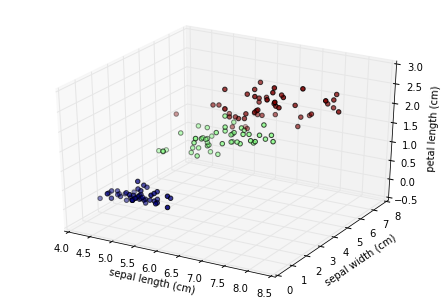

In [25]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris, load_boston, make_classification,\
make_circles, make_moons

#Iris data
data = load_iris()

x = data['data']
y = data['target']

x_labels = data['feature_names']
y_labels = data['target_names']

print x_labels,'\n', y_labels

print x.shape, y.shape

# plt.figure(1)
# plt.scatter(x[:,0],x[:,2], c=y)
# plt.xlabel(x_labels[0])
# plt.ylabel(x_labels[1])

fig = plt.figure(3)
ax = Axes3D(fig)

ax.set_xlabel(x_labels[0])
ax.set_ylabel(x_labels[1])
ax.set_zlabel(x_labels[2])

ax.scatter(x[:,0], x[:,2], x[:,3], c=y)
# plt.savefig('multilineal.eps', format='eps')
# plt.close()

## Interaccion con App Android y Servidor

### Consumir json

In [27]:
import urllib2
import urllib
import json
import random
import time

def getSector(): 
    url = "http://181.65.191.158/RTPrediction/send_dat.php"
    response = urllib.urlopen(url)
    data = json.loads(response.read())
    
    #print int(data['SECTOR']), int(data['SUBSECTOR']) 
    return int(data['SECTOR']), int(data['SUBSECTOR']) #1, 4

# getSector()


### Predecir valor

In [ ]:
def predecir(sector, subsector):
    
    data = []
    data.append(sector)
    data.append(subsector)
    
    #resultados = dfr[['SECTOR','SUBSECTOR', 'CATEGORIA']].loc[indices]
    p = model.predict(data)
    s = model.score(X_test,Y_test)
    
    if sector == 1 and subsector == 2:
        return 'Amagos de Incendio, Incendios, Siniestros', s
    elif sector == 3 and subsector == 2:
        return 'Fuga de Gas', s
    return encoder_categoria.inverse_transform(p)[0], s